In [37]:
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import math
import cv2

In [8]:
pic_path = 'lenna.png'
img = plt.imread(pic_path) # 矩阵/ 255 0-1化  (r g b)
if pic_path[-4:] == '.png':
img = img * 255

In [5]:
img1 = cv2.imread(pic_path)  # (b,g,r)

(-0.5, 511.5, 511.5, -0.5)

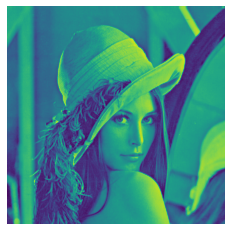

In [14]:
# 灰度化
img_gray = img.mean(axis=-1)  # 取均值就是灰度化了
plt.figure(1)
plt.imshow(img_gray)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

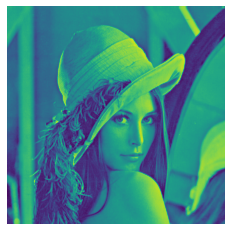

In [17]:
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray1
plt.figure(1)
plt.imshow(img_gray)
plt.axis('off')

In [21]:
img1_rgb2gray = rgb2gray(img1)
img_rgb2gray = rgb2gray(img)

In [24]:
# bgr---rgb---gray
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_rgb = cv2.cvtColor(img1_rgb, cv2.COLOR_RGB2GRAY)
# img1_rgb_rgb2gray = rgb2gray(img1_rgb)

In [25]:
a1 = np.arange(12).reshape(3,4)
a1_mean0 = a1.mean(axis = 0)
a1_mean1 = a1.mean(axis = 1)
a1_mean11 = a1.mean(axis = -1)

In [26]:
dim = 3
tmp = [i-dim//2 for i in range(dim)]


In [30]:
c = 3 // 2
c

1

In [32]:
d = np.arange(12).reshape(3,4)
sd = d.sum()
sd1 = np.sum(d)

In [33]:
3 % 2

1

In [35]:
x = np.arange(5)
y = np.arange(5)
x1,y1 = np.meshgrid(x,y)
x1,y1

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]))

In [36]:
np.linspace(-1,1,5)

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [54]:
np.pad?
# np.pad(array, pad_width, mode='constant', **kwargs)
'''
array, 数组
pad_width, 周围填充的宽度
mode='constant' 填充的模式，默认为常数
'''
a = np.arange(6)
a = a.reshape((2, 3))
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
a1 = np.pad(a, 2, pad_with)
print(a1)
a2 = np.pad(a, 2, pad_with, padder=100)
print(a2, 'a2')

np.pad(a, (2, 3), 'constant', constant_values=(4, 6))

np.pad(a, ((tmp, tmp), (tmp + 1, tmp)), 'constant')  # 边缘填补

[[10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10]
 [10 10  0  1  2 10 10]
 [10 10  3  4  5 10 10]
 [10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10]]
[[100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100   0   1   2 100 100]
 [100 100   3   4   5 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]] a2


In [64]:
import cv2
img = cv2.imread('lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gau = cv2.GaussianBlur(img, (5,5), 0, 0)
img_gau

array([[162, 162, 162, ..., 164, 153, 147],
       [162, 162, 162, ..., 164, 153, 147],
       [162, 162, 162, ..., 164, 153, 147],
       ...,
       [ 46,  47,  49, ..., 101, 101, 101],
       [ 45,  47,  50, ..., 103, 104, 104],
       [ 45,  47,  50, ..., 103, 105, 105]], dtype=uint8)

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [155]:
import cv2 
import numpy as np


In [157]:
cv2.bitwise_and?

In [159]:
def CannyThreshold(lowThreshold):
    detected_edges = cv2.GaussianBlur(gray, (3,3), 0)  # gauss filter
    detected_edges = cv2.Canny(detected_edges, lowThreshold,
                              lowThreshold * ratio,
                              apertureSize = kernel_size)
    # just add some colours to edges from original image
    dst = cv2.bitwise_and(img, img, mask = detected_edges)   # #用原始颜色添加到检测的边缘上
    cv2.imshow('canny demo', dst)
    
if __name__ == '__main__':
    lowThreshold = 0
    max_lowThreshold = 100
    ratio = 3
    kernel_size = 3

    img = cv2.imread('lenna.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    cv2.namedWindow('canny demo')
    
    # 设置调节杆
    cv2.createTrackbar('Min threshold', 'canny demo', lowThreshold, max_lowThreshold, CannyThreshold)
    
    CannyThreshold(0)   # initialization
    if cv2.waitKey(0) == 27:  #wait for ESC key to exit cv2
        cv2.destroyAllWindows()
        


